In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Models.Layers import *
from Solver import *
from Models.Classifiers.Logistic_Classifier import *

In [2]:
# first step would be to import the dataset
X_full = pd.read_csv('./Datasets/red_wine_dataset.csv')
percentage = 0.8
X_full.pop('k_value')
X_full.pop('l_value')
X_full.pop('m_value')
X_train = X_full.sample(frac=percentage, random_state=0)
y_train = X_train.pop('quality')
X_test = X_full.drop(X_train.index)
y_test = X_test.pop('quality')
print(len(X_train.index))
print(len(X_test.index))
X_full


1279
320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,13.750000,0.6615


In [3]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(y_train.shape)

(1279, 13)
(320, 13)
float64
(1279,)


(1279, 13)
(1279,)
0.12433391471702653
0.10003662221022867


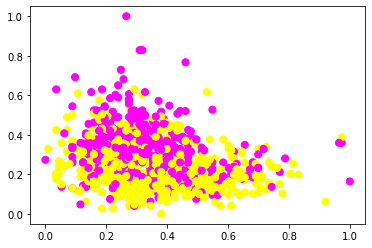

In [4]:
x_max = np.max(x_train, axis = 0)
x_min = np.min(x_train, axis = 0)
x_train = (x_train - x_min) / (x_max - x_min)
mu = x_min
sigma = (x_max - x_min)
print(x_train.shape)
print(y_train.shape)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
print(x_train[:,3].mean())
print(x_train[:,3].std())
plt.show()


In [5]:
class TwoLayerNet():
    def __init__(self, input_dim, hidden_dim, output_dim, reg = 0.01):
        self.reg = reg
        self.params = {}
        # Now we do intialization of the weights
        np.random.seed(0)
        self.params['W'] = np.random.randn(input_dim, hidden_dim)*0.1
        self.params['b'] = np.zeros(hidden_dim)
        self.output_dim = output_dim

    def loss(self,X,y = None):
        # define a mode here, i.e. a training mode or a test mode
        mode = 'test' if y is None else 'train'
        if(mode == 'train'):
            cache = {}
            loss = 0
            grads = {}
            z1, cache['affine'] = affine_forward(X,self.params['W'],self.params['b'])
            a1,cache['relu'] = relu_forward(z1)
            loss, da1 = softmax_loss(a1,y)
            dz1 = relu_backward(da1,cache['relu'])
            grads['x'],grads['W'],grads['b'] = affine_backward(dz1,cache['affine'])
            loss = loss + self.reg * np.sum(self.params['W'] * self.params['W'])
            grads['W'] = grads['W'] + 2 * self.reg * self.params['W']
            return loss, grads
        else:
            z1, cache['affine'] = affine_forward(X,self.params['W'],self.params['b'])
            a1,cache['relu'] = relu_forward(z1)
            loss, da1 = softmax_loss(a1,y)
            loss = loss + self.reg * np.sum(self.params['W'] * self.params['W'])
            return loss
    def predict(self, X):
        cache= {}
        z1, cache['affine'] = affine_forward(X,self.params['W'],self.params['b'])
        scores,cache['relu'] = relu_forward(z1)
        return np.argmax(scores,axis = 1)





In [6]:
Model = TwoLayerNet(input_dim = x_train.shape[1], hidden_dim = 10, output_dim = 3)

loss, grads = Model.loss(x_train, y_train)

print("loss =", loss)

Model.params['W'] = Model.params['W'] - 0.1*grads['W']
Model.params['b'] = Model.params['b'] - 0.1*grads['b']

loss, grads = Model.loss(x_train, y_train)
print("loss after change =", loss)


loss = 2.338015998274456
loss after change = 2.2853082353772467


In [7]:
SGD = Solver(Model, x_train, y_train, lr = 1.5e-5, batch_size = 30, num_epochs = 1000, print_every = 1000)
SGD.train()



Epoch =  0 Batch =  0 Loss =  68.06390774470488 Gradient_max =  0.41542300114804726 learning rate ratio =  0.00424123846113326
Epoch =  1 Batch =  0 Loss =  67.90014509715552 Gradient_max =  0.4149832193235019 learning rate ratio =  0.0002561227944009972
Epoch =  2 Batch =  0 Loss =  67.68551392681577 Gradient_max =  0.41442718012153196 learning rate ratio =  0.0002835959171094992
Epoch =  3 Batch =  0 Loss =  67.46234770393194 Gradient_max =  0.41387067505053277 learning rate ratio =  0.0003172719487685675
Epoch =  4 Batch =  0 Loss =  67.23557315332673 Gradient_max =  0.41331342970030516 learning rate ratio =  0.0003586307535035876
Epoch =  5 Batch =  0 Loss =  67.0066410015432 Gradient_max =  0.4127547741572475 learning rate ratio =  0.00041089126296630263
Epoch =  6 Batch =  0 Loss =  66.77137625032292 Gradient_max =  0.41219679023469236 learning rate ratio =  0.0004782710295911457
Epoch =  7 Batch =  0 Loss =  66.52088829236503 Gradient_max =  0.41164396335508363 learning rate rat

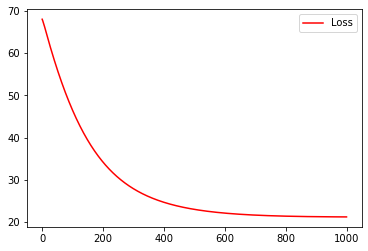

In [8]:
epochs = range(0,SGD.num_epochs)
plt.plot(epochs, SGD.loss_history, label = 'Loss', color = 'red')
plt.legend()
plt.show()

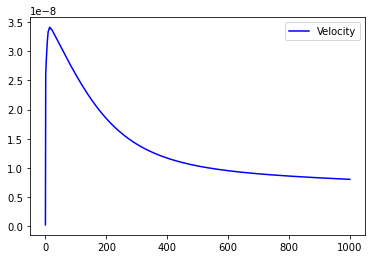

In [9]:
plt.plot(epochs, SGD.vel_history, label = 'Velocity', color = 'blue')
plt.legend()
plt.show()

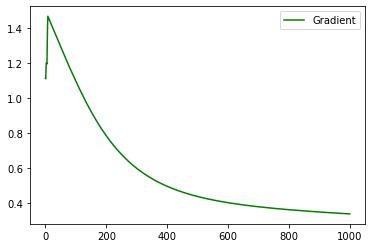

In [15]:
plt.plot(epochs, SGD.grad_history, label = 'Absolute Gradient', color = 'green')
plt.legend()
plt.show()

In [14]:
def training_accuracy(model, x_train,y_train):
    y_pred = model.predict(x_train)
    y_new = y_train.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

print(np.sum(Model.predict(x_train)))
training_accuracy(Model, x_train, y_train)



593


0.39874902267396406

In [11]:
def test_accuracy(model, x_test, y_test, mu, sigma):
    y_pred = model.predict((x_test - mu) / sigma)
    y_new = y_test.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

x_test_new = x_test
x_test_new = x_test_new 
test_accuracy(Model, x_test_new, y_test, mu, sigma)

0.384375